In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [4]:
df = pd.read_csv('data/citibike_ZIP.csv')
df.head()

,tripduration,starttime,stoptime,start_id,start_name,start_lat,start_lon,end_id,end_name,end_lat,end_lon,bikeid,usertype,birth_year,gender,weekday,hour,geometry,zip_start,zip_end
0,17.700000,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,0,0,POINT (989370.1838770027 186756.53892500512),11217,11217.0
1,63.500000,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,0,0,POINT (992875.4144866021 191851.65323921342),11205,10012.0
2,16.950000,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,0,0,POINT (993883.8241576733 198112.87322040228),11249,11238.0
3,3.766667,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,0,0,POINT (985722.6805079061 212735.19209770544),10001,10001.0
4,23.950000,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,0,0,POINT (992368.8021711168 215540.1540624901),10022,10003.0


In [7]:
# 21% of rides start and end in same zip code
100*len(df[df['zip_start'] == df['zip_end']])/len(df)

20.822701155439354

In [8]:
# 6% of rides start and end at same station
100*len(df[df['start_id'] == df['end_id']])/len(df)

6.439034756555995

In [27]:
same_zip = [20.82, (100-20.82)]
same_station = [6.43, (100-6.43)]

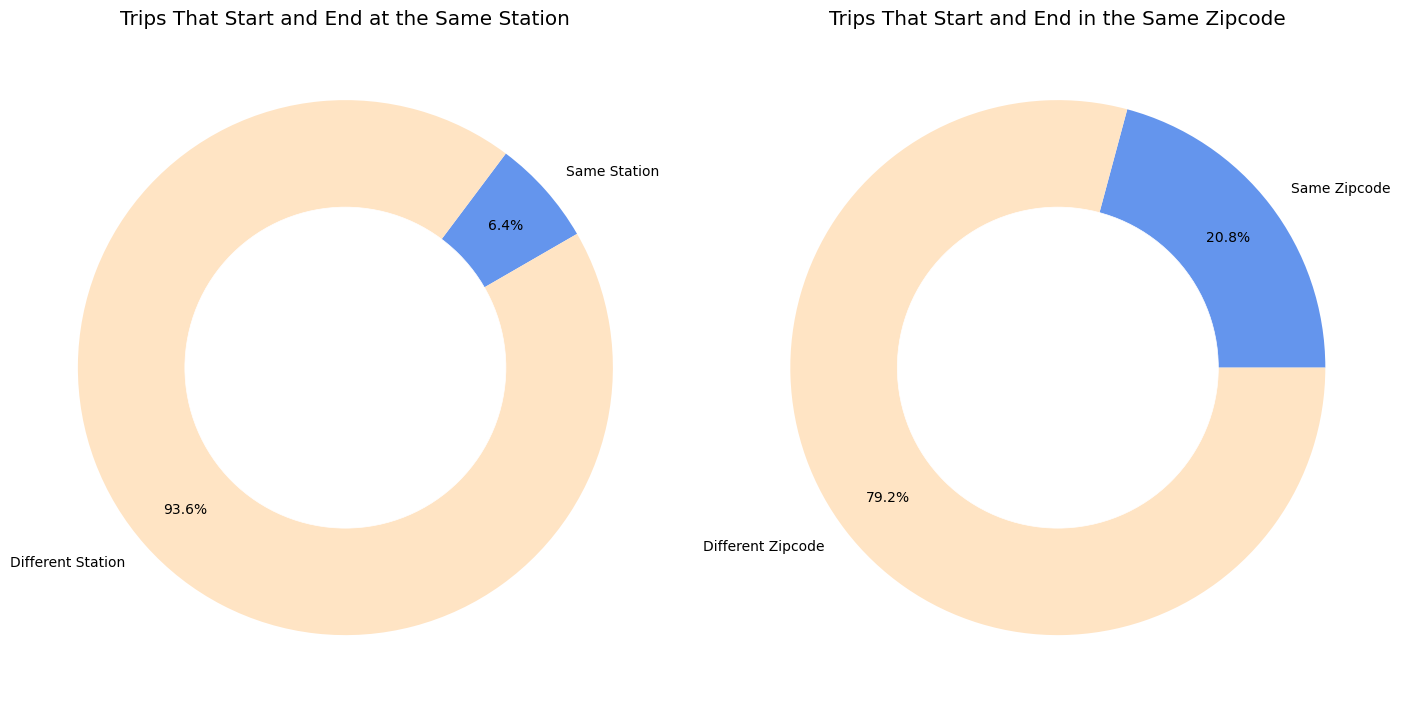

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, 
                        figsize=(14, 7),
                        sharex=False,
                        sharey=False,
                        constrained_layout=True)

labels_station = 'Same Station', 'Different Station'
ax1.pie(x=same_station, labels=labels_station, colors=['cornflowerblue','bisque'], labeldistance = 1.1, 
        rotatelabels = False, autopct='%1.1f%%', pctdistance = .8, startangle = 30)
ax1.title.set_text('Trips That Start and End at the Same Station')

circle_1 = plt.Circle((0,0), 0.6, color='white')
ax1.add_artist(circle_1)

labels_zip = 'Same Zipcode', 'Different Zipcode'
ax2.pie(x=same_zip, labels=labels_zip, colors=['cornflowerblue','bisque'], labeldistance = 1.1, 
        rotatelabels = False, autopct='%1.1f%%', pctdistance = .8)
ax2.title.set_text('Trips That Start and End in the Same Zipcode')

circle_2 = plt.Circle((0,0), 0.6, color='white')
ax2.add_artist(circle_2)